In [1]:
library(tidyverse)
library(tidymodels)
tidymodels_prefer()
readr::read_csv("/kaggle/input/hepatitis-c-prediction/HepatitisCdata.csv") -> hepc


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Explanatory Data Analysis

   In this dataset we are expected to find if patients have a specific condition related to Hepatitis C. Our aim is to develop two machine learning models with different approaches; Gradient Boosting and Dense Layered Networks. 
    
   We will start with an explanatory data analysis for our initial model. This way we can discover the structure of the dataset. 
    




In [2]:
str(hepc)

spc_tbl_ [615 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1    : num [1:615] 1 2 3 4 5 6 7 8 9 10 ...
 $ Category: chr [1:615] "0=Blood Donor" "0=Blood Donor" "0=Blood Donor" "0=Blood Donor" ...
 $ Age     : num [1:615] 32 32 32 32 32 32 32 32 32 32 ...
 $ Sex     : chr [1:615] "m" "m" "m" "m" ...
 $ ALB     : num [1:615] 38.5 38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 ...
 $ ALP     : num [1:615] 52.5 70.3 74.7 52 74.1 43.3 41.3 41.9 65.5 86.3 ...
 $ ALT     : num [1:615] 7.7 18 36.2 30.6 32.6 18.5 17.5 35.8 23.2 20.3 ...
 $ AST     : num [1:615] 22.1 24.7 52.6 22.6 24.8 19.7 17.8 31.1 21.2 20 ...
 $ BIL     : num [1:615] 7.5 3.9 6.1 18.9 9.6 12.3 8.5 16.1 6.9 35.2 ...
 $ CHE     : num [1:615] 6.93 11.17 8.84 7.33 9.15 ...
 $ CHOL    : num [1:615] 3.23 4.8 5.2 4.74 4.32 6.05 4.79 4.6 4.1 4.45 ...
 $ CREA    : num [1:615] 106 74 86 80 76 111 70 109 83 81 ...
 $ GGT     : num [1:615] 12.1 15.6 33.2 33.8 29.9 91 16.9 21.5 13.7 15.9 ...
 $ PROT    : num [1:615] 69 76.5 79.3 75.7

   Instantly we can see that the row numbers are included in the dataset.Furthermore, Sex and Category seems like a character variable. We are going to change these variables to factors and remove the row ids. 

In [3]:

hepc$Sex <- as.factor(hepc$Sex)
hepc%>%select(!c("...1")) -> hepc

#To provide a cleaner view;
hepc%>%mutate(Category = case_when(Category == "0=Blood Donor"~"bd",
                                  Category == "0S=suspect Blood Donor"~"sbd",
                                  Category == "1=Hepatitis" ~ "hpc",
                                  Category == "2=Fibrosis"~"fb",
                                  Category == "3=Cirrhosis"~"cr")) -> hepc

#We encoded Blood Donor as bd and etc. 

hepc$Category <- as.factor(hepc$Category)

str(hepc)

tibble [615 × 13] (S3: tbl_df/tbl/data.frame)
 $ Category: Factor w/ 4 levels "bd","cr","fb",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Age     : num [1:615] 32 32 32 32 32 32 32 32 32 32 ...
 $ Sex     : Factor w/ 2 levels "f","m": 2 2 2 2 2 2 2 2 2 2 ...
 $ ALB     : num [1:615] 38.5 38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 ...
 $ ALP     : num [1:615] 52.5 70.3 74.7 52 74.1 43.3 41.3 41.9 65.5 86.3 ...
 $ ALT     : num [1:615] 7.7 18 36.2 30.6 32.6 18.5 17.5 35.8 23.2 20.3 ...
 $ AST     : num [1:615] 22.1 24.7 52.6 22.6 24.8 19.7 17.8 31.1 21.2 20 ...
 $ BIL     : num [1:615] 7.5 3.9 6.1 18.9 9.6 12.3 8.5 16.1 6.9 35.2 ...
 $ CHE     : num [1:615] 6.93 11.17 8.84 7.33 9.15 ...
 $ CHOL    : num [1:615] 3.23 4.8 5.2 4.74 4.32 6.05 4.79 4.6 4.1 4.45 ...
 $ CREA    : num [1:615] 106 74 86 80 76 111 70 109 83 81 ...
 $ GGT     : num [1:615] 12.1 15.6 33.2 33.8 29.9 91 16.9 21.5 13.7 15.9 ...
 $ PROT    : num [1:615] 69 76.5 79.3 75.7 68.7 74 74.5 67.1 71.3 69.9 ...


   Let us first start with the distribution of missing values in general. 

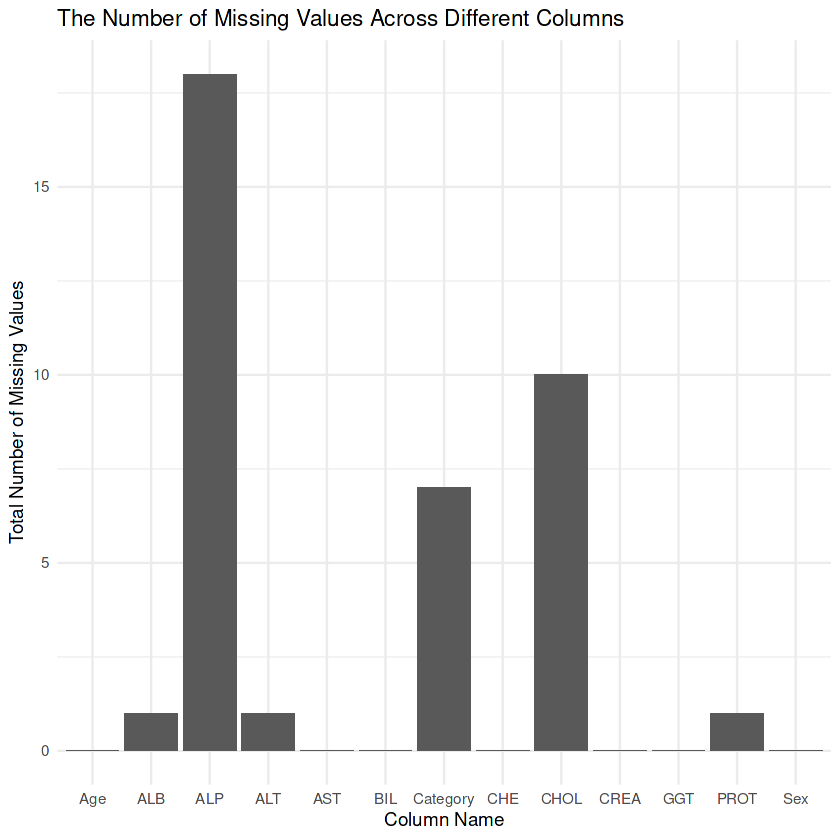

In [4]:
ggplot(pivot_longer(as.data.frame(lapply(lapply(hepc, is.na), sum)), 
                  cols = colnames(as.data.frame(lapply(lapply(hepc, is.na), sum))), 
                  values_to = "spec"), 
       mapping = aes(x = name, y =  spec)) + geom_col() + 
  ggtitle(label = "The Number of Missing Values Across Different Columns") + 
  xlab(label = "Column Name") + ylab(label = "Total Number of Missing Values") + 
  theme_minimal()

We can see that some variables contain missing values. Especially, ALP contains missing values over 15. Even our dependent variable, Category, contains missing values. This will be our obstacle one in feature engineering step. Now let us see the distribution of the variables. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 38 rows containing non-finite values (`stat_bin()`).”


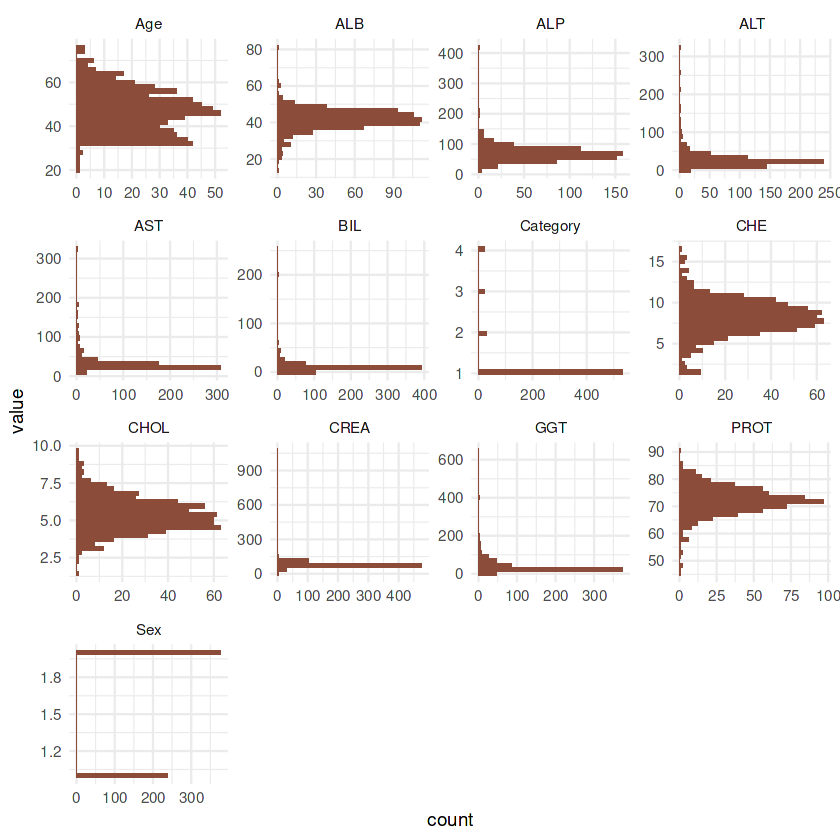

In [5]:
hepc_vis <- hepc
hepc_vis$Category <- as.numeric(hepc$Category)
hepc_vis$Sex <- as.numeric(hepc$Sex)
hepc_vis <- hepc_vis%>%pivot_longer(cols = colnames(hepc_vis), values_to = "value", names_to = "spec")
hepc_vis%>%
group_by(spec)%>%
ggplot(mapping = aes(y = value)) + geom_histogram(fill = "salmon4") + 
facet_wrap(~spec, scales = "free") + theme_minimal()

The immediate thing that we should realize is the distribution of the values. Values such as
   * ALB
   * CHE
   * CHOL
   * PROT
   
   Looks like a normal distribution. Which can be helpful while we are median imputing. Except CHE they all contain missing values. Nonetheless, one problematic thing is the distribution of the category. The data contains lots of variables from "Category 1" which is just blood donor. It is extremely right skewed and at this point It is better to ask for more data. Nonetheless, since enhancing the dataset is impossible we are planning to overcome this problem with different means.The rest of variables don't show a distribution pattern to a normal distribution or even if they do variance is too big. Therefore, we have to group variables and fill the missing values while keeping these tips in mind.  

## Relationship Analysis

In this section, we will focus on a more explanatory approach.It is important to understand the relationship between variables and do some research in the area to explain. Generally, a linear regression analysis and a correlation matrix can outshine such information. Let's start with a correlation plot. 



tibble [615 × 13] (S3: tbl_df/tbl/data.frame)
 $ Category: num [1:615] 1 1 1 1 1 1 1 1 1 1 ...
 $ Age     : num [1:615] 32 32 32 32 32 32 32 32 32 32 ...
 $ Sex     : num [1:615] 2 2 2 2 2 2 2 2 2 2 ...
 $ ALB     : num [1:615] 38.5 38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 ...
 $ ALP     : num [1:615] 52.5 70.3 74.7 52 74.1 43.3 41.3 41.9 65.5 86.3 ...
 $ ALT     : num [1:615] 7.7 18 36.2 30.6 32.6 18.5 17.5 35.8 23.2 20.3 ...
 $ AST     : num [1:615] 22.1 24.7 52.6 22.6 24.8 19.7 17.8 31.1 21.2 20 ...
 $ BIL     : num [1:615] 7.5 3.9 6.1 18.9 9.6 12.3 8.5 16.1 6.9 35.2 ...
 $ CHE     : num [1:615] 6.93 11.17 8.84 7.33 9.15 ...
 $ CHOL    : num [1:615] 3.23 4.8 5.2 4.74 4.32 6.05 4.79 4.6 4.1 4.45 ...
 $ CREA    : num [1:615] 106 74 86 80 76 111 70 109 83 81 ...
 $ GGT     : num [1:615] 12.1 15.6 33.2 33.8 29.9 91 16.9 21.5 13.7 15.9 ...
 $ PROT    : num [1:615] 69 76.5 79.3 75.7 68.7 74 74.5 67.1 71.3 69.9 ...


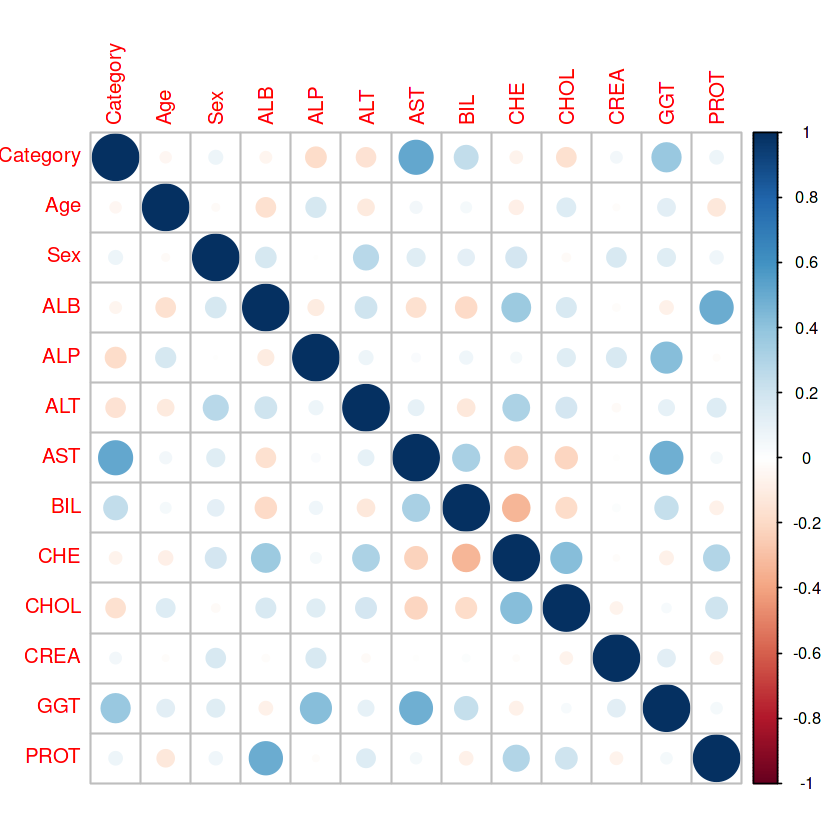

In [6]:
hepc_full_n <- hepc
hepc_full_n$Category <- as.numeric(hepc_full_n$Category)
hepc_full_n$Sex <- as.numeric(hepc_full_n$Sex)
str(hepc_full_n)
hepc_full_n <- na.omit(hepc_full_n) 
corrplot::corrplot(cor(hepc_full_n))

In [7]:
summary(lm(Category~., hepc_full_n))
summary(lm(Category~.^2, hepc_full_n))


Call:
lm(formula = Category ~ ., data = hepc_full_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60839 -0.20947 -0.08233  0.08377  2.60701 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.2105911  0.3324793   3.641 0.000296 ***
Age         -0.0041288  0.0020918  -1.974 0.048885 *  
Sex         -0.0147763  0.0444006  -0.333 0.739411    
ALB         -0.0016436  0.0045068  -0.365 0.715470    
ALP         -0.0082633  0.0009066  -9.114  < 2e-16 ***
ALT         -0.0107022  0.0014666  -7.297 9.92e-13 ***
AST          0.0076493  0.0007701   9.933  < 2e-16 ***
BIL          0.0029774  0.0012566   2.369 0.018153 *  
CHE          0.0561607  0.0115468   4.864 1.49e-06 ***
CHOL        -0.0320836  0.0205661  -1.560 0.119311    
CREA         0.0007404  0.0003996   1.853 0.064433 .  
GGT          0.0043068  0.0004992   8.627  < 2e-16 ***
PROT         0.0041807  0.0047988   0.871 0.384014    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 


Call:
lm(formula = Category ~ .^2, data = hepc_full_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58584 -0.14047 -0.02218  0.09314  2.51710 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.723e+00  2.588e+00  -0.666 0.505767    
Age          2.669e-03  2.742e-02   0.097 0.922486    
Sex          9.466e-01  6.368e-01   1.487 0.137757    
ALB          7.559e-02  5.581e-02   1.355 0.176154    
ALP          2.779e-02  1.529e-02   1.818 0.069678 .  
ALT         -4.087e-02  2.639e-02  -1.549 0.122088    
AST          4.617e-02  1.669e-02   2.767 0.005865 ** 
BIL         -3.399e-02  3.135e-02  -1.084 0.278828    
CHE          2.187e-01  1.858e-01   1.177 0.239882    
CHOL        -1.398e-01  3.130e-01  -0.447 0.655320    
CREA        -2.213e-02  1.904e-02  -1.163 0.245502    
GGT         -2.446e-02  1.335e-02  -1.832 0.067548 .  
PROT         3.167e-04  4.016e-02   0.008 0.993711    
Age:Sex     -4.374e-03  4.433e-03  -0.987 0.324235    


The linear model above also shows the significant impact of correlated variables. A model with full interaction terms explain the variance between independent and dependent variables around 69 percent. Now, for a further take we are going to focus on the significant variables. 

In [8]:
summary(lm(Category~(ALB + ALP + ALT + AST + CHE + CREA + GGT)^2, hepc_full_n))


Call:
lm(formula = Category ~ (ALB + ALP + ALT + AST + CHE + CREA + 
    GGT)^2, data = hepc_full_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02453 -0.15509 -0.03191  0.07424  2.60316 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.278e-01  8.876e-01  -1.045 0.296349    
ALB          5.728e-02  2.277e-02   2.515 0.012171 *  
ALP          3.759e-02  7.437e-03   5.054 5.89e-07 ***
ALT         -7.528e-02  1.438e-02  -5.234 2.36e-07 ***
AST          2.199e-02  6.908e-03   3.184 0.001535 ** 
CHE         -5.309e-02  8.104e-02  -0.655 0.512666    
CREA         1.508e-02  7.653e-03   1.971 0.049211 *  
GGT         -1.663e-03  4.650e-03  -0.358 0.720695    
ALB:ALP     -9.568e-04  1.907e-04  -5.018 7.06e-07 ***
ALB:ALT      6.677e-04  2.890e-04   2.311 0.021219 *  
ALB:AST     -1.121e-04  1.905e-04  -0.589 0.556331    
ALB:CHE      4.653e-03  1.659e-03   2.805 0.005208 ** 
ALB:CREA    -5.338e-04  2.061e-04  -2.590 0.009837 ** 
ALB:GGT  

This may indicate that we have found our core variables. With this we come to an end  of our explanatory data analysis. It is time to start to a feature engineering process. We aim to improve few things. First thing is to fill the missing values and test linear models again. After this step we are going to focus on a principal component analysis to reduce the dimensions of variables with low prediction rate. After that, we are going to start developing our machine learning models. 

# Feature Engineering
## Missing Values

We are going to use the "mice" package to analyze the missing data and overcome possible problems on it. 

,Age,Sex,AST,BIL,CHE,CREA,GGT,ALB,ALT,PROT,Category,CHOL,ALP,
582,1,1,1,1,1,1,1,1,1,1,1,1,1,0
15,1,1,1,1,1,1,1,1,1,1,1,1,0,1
7,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
7,1,1,1,1,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1,1,0,1,0,0,3
1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1,0,1,1,1,0,0,3
,0,0,0,0,0,0,0,1,1,1,7,10,18,38


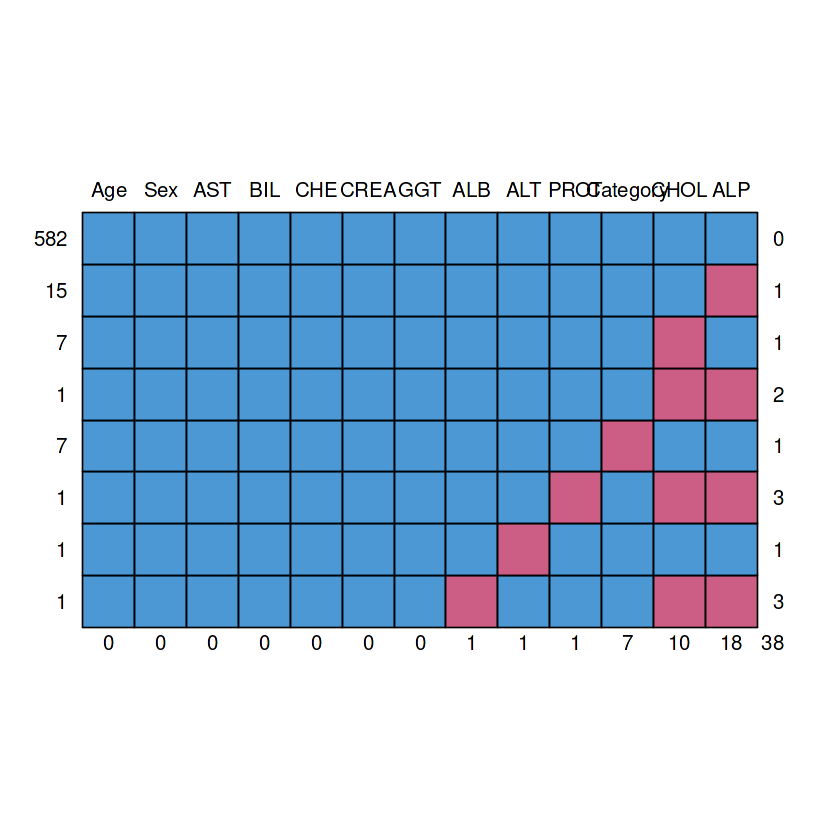

In [9]:
library(mice)
md.pattern(hepc)


Although data maybe missing, we need two important information. Is it missing at random? If so, we can impute in a more precise manner. If not, then we may have some problems. We can not know the why the data is missing since there are no explanations in the dataset. 

Another important future is the total number of missing values at the SAME TIME. What does this mean? This means that if one or two variables are missing at the same time it is easier to impute them while looking at other variables and figuring out the relationships between them. Nonetheless, if the data contains missing rows at the same time from different columns our prediction success may decrease. 

According to the dataset, at most we have three missing values at the same time in total of 6 rows. Generally our rate of missing values are either 2 or 1. This means that we can impute the missing values with different approaches. 


We are going to use three imputation methods and check their sanity. First, the well known approach "Predictive Mean Matching" following that we are going to use "Random Forests" to impute and finally we will use "Classification and Regression Trees"

In [10]:
set.seed(100)
impute_pmm <- mice(hepc, m = 5, method = "pmm")
impute_cart <- mice(hepc, m = 5, method = "cart")



 iter imp variable
  1   1  Category  ALB  ALP  ALT  CHOL  PROT
  1   2  Category  ALB  ALP  ALT  CHOL  PROT
  1   3  Category  ALB  ALP  ALT  CHOL  PROT
  1   4  Category  ALB  ALP  ALT  CHOL  PROT
  1   5  Category  ALB  ALP  ALT  CHOL  PROT
  2   1  Category  ALB  ALP  ALT  CHOL  PROT
  2   2  Category  ALB  ALP  ALT  CHOL  PROT
  2   3  Category  ALB  ALP  ALT  CHOL  PROT
  2   4  Category  ALB  ALP  ALT  CHOL  PROT
  2   5  Category  ALB  ALP  ALT  CHOL  PROT
  3   1  Category  ALB  ALP  ALT  CHOL  PROT
  3   2  Category  ALB  ALP  ALT  CHOL  PROT
  3   3  Category  ALB  ALP  ALT  CHOL  PROT
  3   4  Category  ALB  ALP  ALT  CHOL  PROT
  3   5  Category  ALB  ALP  ALT  CHOL  PROT
  4   1  Category  ALB  ALP  ALT  CHOL  PROT
  4   2  Category  ALB  ALP  ALT  CHOL  PROT
  4   3  Category  ALB  ALP  ALT  CHOL  PROT
  4   4  Category  ALB  ALP  ALT  CHOL  PROT
  4   5  Category  ALB  ALP  ALT  CHOL  PROT
  5   1  Category  ALB  ALP  ALT  CHOL  PROT
  5   2  Category  ALB  ALP  ALT  C

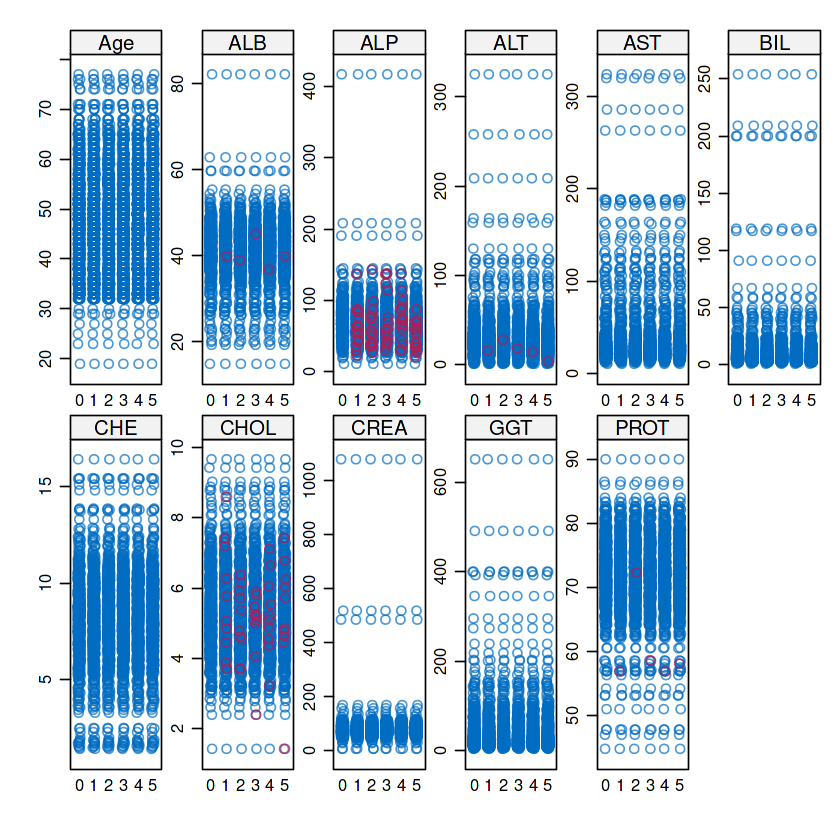

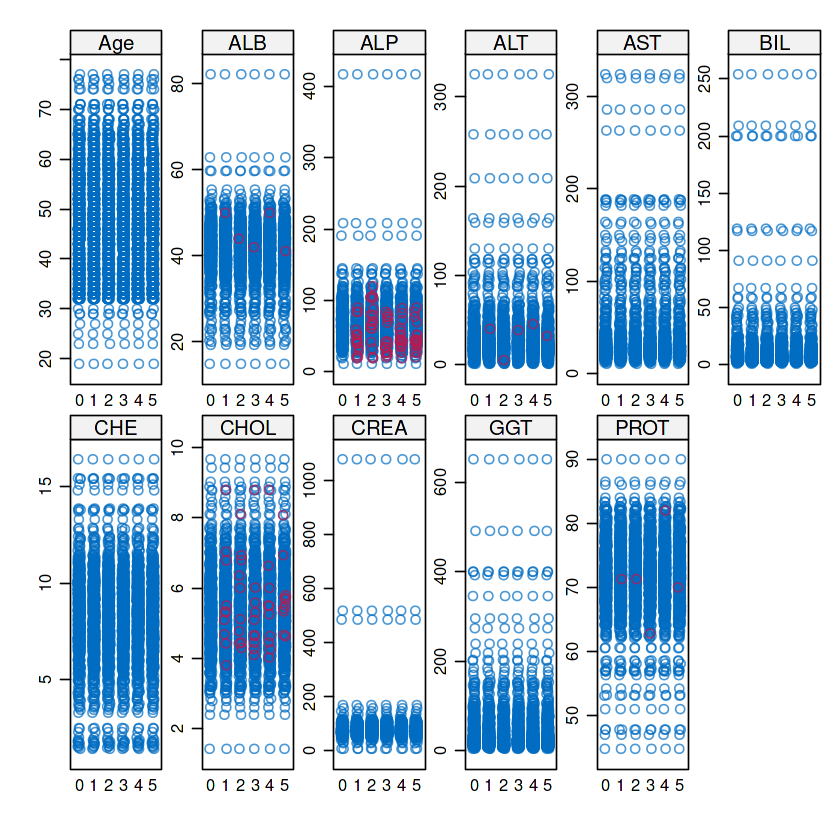

In [11]:
complete_hepc_pmm <- complete(impute_pmm)
complete_hepc_cart <- complete(impute_cart)
stripplot(impute_pmm)
stripplot(impute_cart)

In [12]:
complete_hepc_pmm$Category <- as.numeric(complete_hepc_pmm$Category)
complete_hepc_cart$Category <- as.numeric(complete_hepc_cart$Category)

summary(lm(Category~(ALB + ALP + ALT + AST + CHE + CREA + GGT)^2, complete_hepc_pmm))
summary(lm(Category~(ALB + ALP + ALT + AST + CHE + CREA + GGT)^2, complete_hepc_cart))
summary(lm(Category~.^2, complete_hepc_pmm))
summary(lm(Category~.^2, complete_hepc_cart))


Call:
lm(formula = Category ~ (ALB + ALP + ALT + AST + CHE + CREA + 
    GGT)^2, data = complete_hepc_pmm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10253 -0.20425 -0.06778  0.07841  2.64055 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.575e-01  9.317e-01  -0.169 0.865841    
ALB          2.378e-02  2.328e-02   1.022 0.307333    
ALP          2.626e-02  7.914e-03   3.319 0.000961 ***
ALT          1.101e-03  1.060e-02   0.104 0.917318    
AST          2.291e-02  6.835e-03   3.352 0.000853 ***
CHE         -1.303e-01  8.279e-02  -1.573 0.116152    
CREA         1.225e-02  7.522e-03   1.628 0.103964    
GGT         -8.341e-03  3.844e-03  -2.170 0.030409 *  
ALB:ALP     -5.099e-04  2.054e-04  -2.483 0.013306 *  
ALB:ALT      3.317e-05  2.374e-04   0.140 0.888948    
ALB:AST     -3.110e-04  1.761e-04  -1.766 0.077923 .  
ALB:CHE      5.745e-03  1.505e-03   3.818 0.000149 ***
ALB:CREA    -3.779e-04  1.754e-04  -2.155 0.031573 *  
ALB


Call:
lm(formula = Category ~ (ALB + ALP + ALT + AST + CHE + CREA + 
    GGT)^2, data = complete_hepc_cart)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06297 -0.20610 -0.06671  0.08929  2.70369 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.677e-01  9.449e-01  -0.283 0.777017    
ALB          2.330e-02  2.368e-02   0.984 0.325390    
ALP          2.981e-02  7.912e-03   3.768 0.000181 ***
ALT          7.627e-03  9.897e-03   0.771 0.441213    
AST          1.844e-02  6.579e-03   2.802 0.005247 ** 
CHE         -1.656e-01  7.858e-02  -2.107 0.035535 *  
CREA         1.593e-02  7.414e-03   2.149 0.032060 *  
GGT         -9.201e-03  3.788e-03  -2.429 0.015436 *  
ALB:ALP     -5.832e-04  2.061e-04  -2.829 0.004822 ** 
ALB:ALT     -5.804e-05  2.270e-04  -0.256 0.798310    
ALB:AST     -2.104e-04  1.689e-04  -1.246 0.213354    
ALB:CHE      6.957e-03  1.440e-03   4.829 1.75e-06 ***
ALB:CREA    -4.433e-04  1.748e-04  -2.536 0.011473 *  
AL


Call:
lm(formula = Category ~ .^2, data = complete_hepc_pmm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82148 -0.17395 -0.03195  0.09577  2.39800 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.468e+00  2.375e+00  -1.039 0.299140    
Age         -4.385e-02  3.044e-02  -1.440 0.150339    
Sexm         1.791e+00  6.837e-01   2.619 0.009062 ** 
ALB          2.198e-02  5.760e-02   0.382 0.702868    
ALP          2.014e-02  1.512e-02   1.332 0.183331    
ALT         -4.981e-02  1.724e-02  -2.889 0.004019 ** 
AST          3.816e-02  1.623e-02   2.351 0.019060 *  
BIL         -2.382e-02  3.492e-02  -0.682 0.495514    
CHE         -1.197e-02  1.654e-01  -0.072 0.942373    
CHOL         3.868e-01  3.317e-01   1.166 0.244062    
CREA        -2.378e-02  1.970e-02  -1.207 0.227876    
GGT         -1.470e-02  9.468e-03  -1.553 0.121091    
PROT         8.911e-02  3.951e-02   2.255 0.024521 *  
Age:Sexm    -1.762e-02  4.878e-03  -3.611 0.00033


Call:
lm(formula = Category ~ .^2, data = complete_hepc_cart)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83393 -0.17648 -0.03028  0.09515  2.80080 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.320e+00  2.386e+00  -1.391 0.164680    
Age         -3.797e-02  3.050e-02  -1.245 0.213741    
Sexm         1.593e+00  6.829e-01   2.333 0.020041 *  
ALB          2.917e-02  5.751e-02   0.507 0.612190    
ALP          1.873e-02  1.503e-02   1.247 0.213085    
ALT         -1.877e-02  1.720e-02  -1.091 0.275795    
AST          3.138e-02  1.621e-02   1.936 0.053372 .  
BIL         -2.572e-02  3.561e-02  -0.722 0.470456    
CHE          2.495e-03  1.661e-01   0.015 0.988020    
CHOL         3.754e-01  3.401e-01   1.104 0.270254    
CREA        -2.247e-02  1.968e-02  -1.142 0.254044    
GGT         -1.218e-02  9.487e-03  -1.283 0.199882    
PROT         9.710e-02  3.933e-02   2.469 0.013858 *  
Age:Sexm    -1.674e-02  4.818e-03  -3.474 0.0005

Both approaches share a similar performance. Although this is not a measure of how good the data is imputed, it is a measure of to check if the variance explanation changed compared to the past linear models. If the importance of different variables change significantly then the imputation may be problematic. Nonetheless, mice is a well known package. 

## Principal Component Analysis

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Age,-0.17258904,0.125736976,0.45745331,-0.29657442,0.41784520,-0.61216766,0.0002000385,-0.27797165,0.16715673,0.02655706,0.04386963
ALB,0.44043715,0.177094725,-0.27672483,0.17158652,0.22157343,-0.10858020,0.2121965131,-0.21528752,0.06324498,0.62897690,-0.34170400
ALP,-0.20561690,0.401472952,0.36832741,0.23973178,-0.01004557,0.41215296,0.4016341311,-0.26484443,0.12871696,-0.23339591,-0.36185567
ALT,-0.05865687,0.430389927,-0.16586981,-0.29443436,-0.56383776,-0.05804917,-0.2756320303,-0.51741459,-0.14596383,0.08156548,0.06471113
AST,-0.35618241,0.287516444,-0.40444449,-0.16697851,0.05108619,-0.25306826,-0.0863694330,0.41479599,0.03776185,-0.16725866,-0.56871879
BIL,-0.34897773,-0.007040833,-0.24408917,0.12265322,0.47567399,0.38310752,-0.5249982981,-0.27982392,0.24053422,0.10733061,0.08487229
CHE,0.40912400,0.304575463,0.13514395,-0.04615373,-0.14694749,0.04823280,-0.2603079096,0.27561155,0.73249284,-0.08081278,0.09348222
CHOL,0.29030254,0.318783193,0.37166307,-0.12100922,0.24964151,0.21997290,-0.4061617678,0.24885956,-0.54967311,0.05758321,-0.13513422
CREA,-0.06540388,0.077241980,0.12206378,0.81262081,-0.17048423,-0.40831378,-0.3272463352,-0.01074702,-0.08889225,-0.05353297,-0.02730513
GGT,-0.33956371,0.478905753,-0.03926797,0.10106140,0.03747484,0.02241213,0.2651368519,0.35157780,-0.05547125,0.38213073,0.54651465


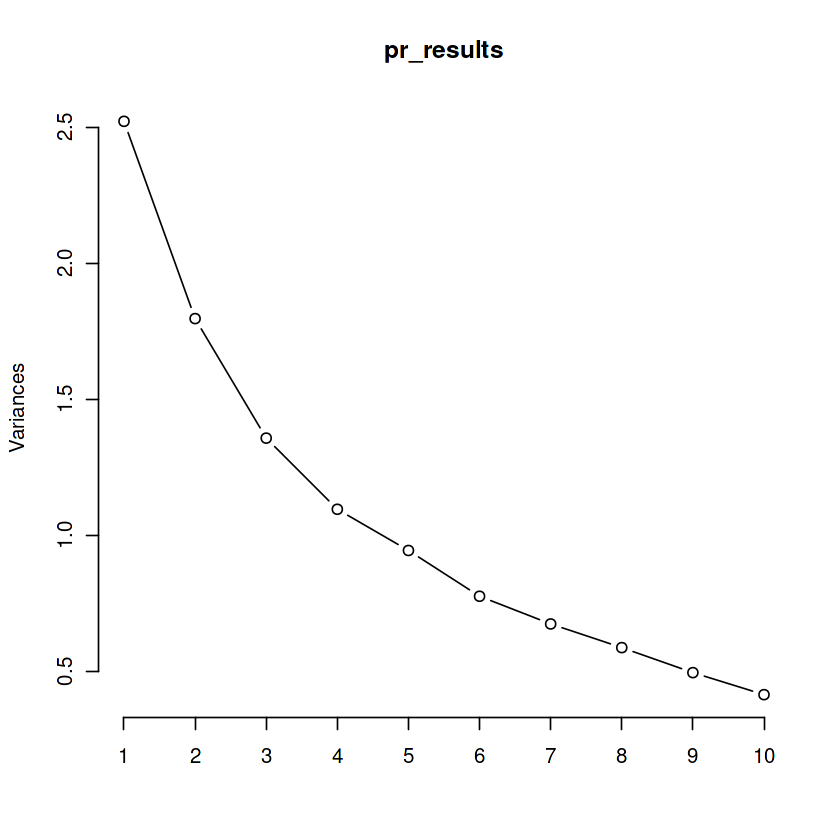

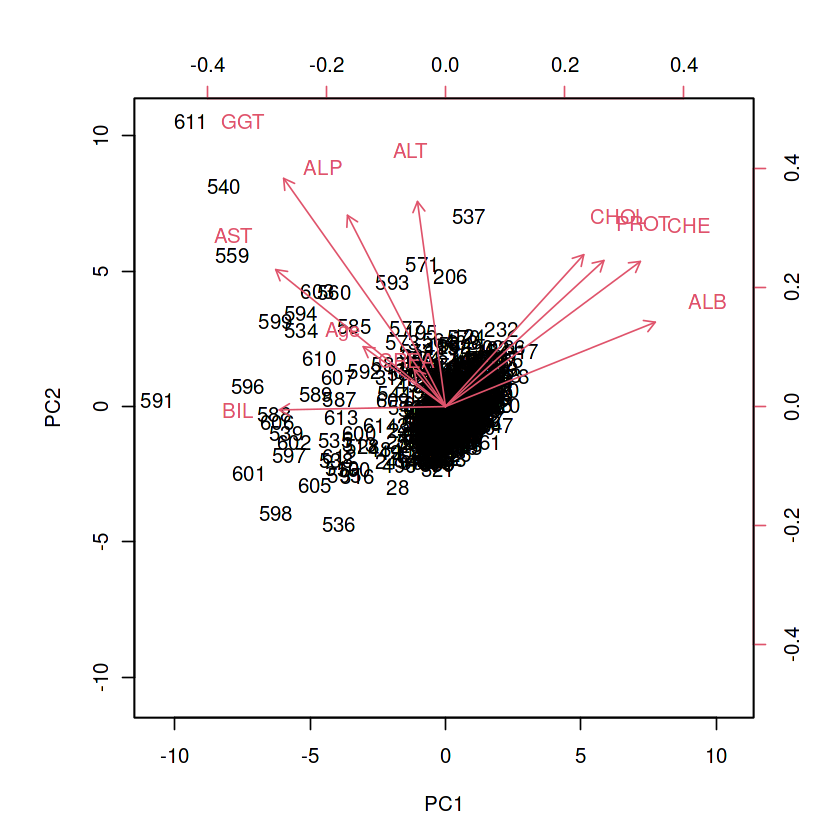

In [13]:
complete_hepc_pmm$Sex <- as.numeric(complete_hepc_pmm$Sex)
complete_hepc_pmm%>%select(!c("Category","Sex")) -> complete_hepc_pmm_wcat
pr_results <- prcomp(complete_hepc_pmm_wcat, scale = TRUE)
pr_results$rotation <- -1*pr_results$rotation
pr_results$rotation
plot(pr_results, type="l")

pr_results$x <- -1*pr_results$x
biplot(pr_results, scale = 0)

## Distribution and Sampling






`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Category,n
<dbl>,<int>
1,537
2,33
3,21
4,24


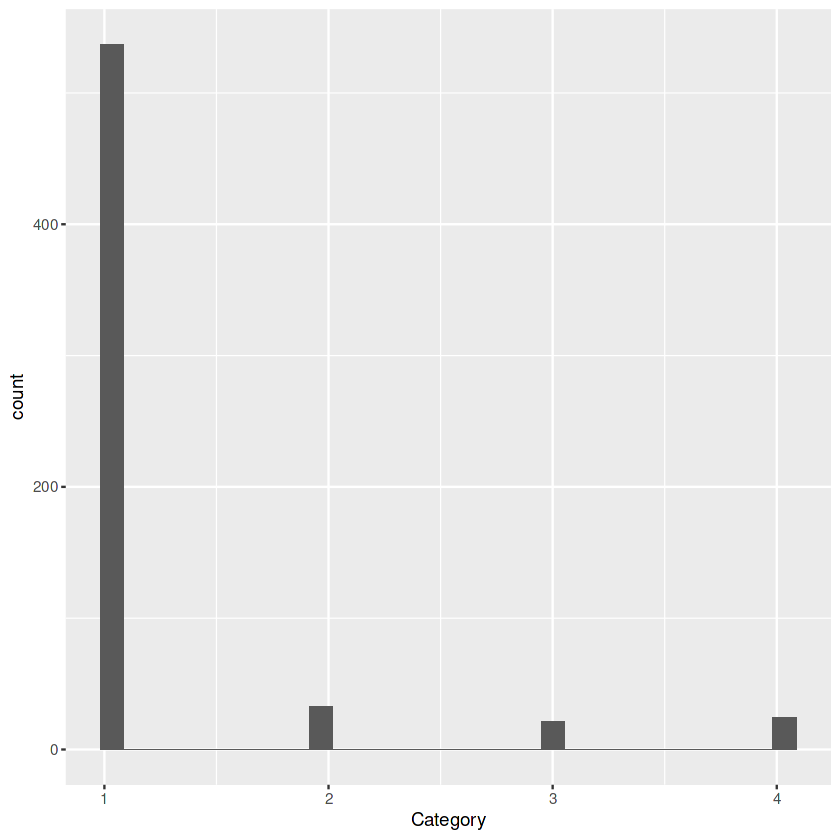

In [14]:
complete_hepc_pmm%>%ggplot(mapping = aes(x = Category)) + geom_histogram()
complete_hepc_pmm%>%group_by(Category)%>%count()

As can be seen data is not equally distributed and therefore training and test set may show unrealistic accuracy rates. Since it is impossible to ask for more data, we need a solution to overcome this problem. With a train test split, all accuracy scores will be extremely high and biased. Generating data on medical examples may also lead to bias. Let us start with an initial model and escalate from that standpoint. 


# Initial Machine Learning Model

Since Category column is exceptionally unequal we are going to use stratified sampling instead of a random sampling. This is due to the fact that we want to represent the dataset in our split as realistic as possible with the same distribution. Let us start with defining the dataset that we are going to use "complete_hepc_pmm" as the "hepc" and use a train test split with stratification.

In [15]:
complete_hepc_pmm -> hepc
initial_split(hepc, props = 0.75, strata = "Category") -> hepc.split
training(hepc.split) -> hepc_train
testing(hepc.split) -> hepc_test




hepc_train%>%group_by(Category)%>%count()
hepc_test%>%group_by(Category)%>%count()

hepc_train$Category <- as.factor(hepc_train$Category)
hepc_train$Sex <- as.factor(hepc_train$Sex)

hepc_test$Category <- as.factor(hepc_test$Category)
hepc_test$Sex <- as.factor(hepc_test$Sex)

head(hepc_train)
head(hepc_test)

Category,n
<dbl>,<int>
1,404
2,22
3,18
4,17


Category,n
<dbl>,<int>
1,133
2,11
3,3
4,7


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74,15.6,76.5
4,1,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
7,1,32,2,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70,16.9,74.5
8,1,32,2,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109,21.5,67.1
9,1,32,2,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83,13.7,71.3
10,1,32,2,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81,15.9,69.9


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69.0
3,1,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86,33.2,79.3
5,1,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7
6,1,32,2,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91.0,74.0
18,1,33,2,45.2,88.3,32.4,31.2,10.1,9.78,5.51,102,48.5,76.5
20,1,33,2,42.0,63.1,32.6,34.9,11.2,7.01,4.05,105,19.1,68.1


In [16]:
## XGBOOST and Keras Engines

xgb_model <- boost_tree()%>%set_engine("xgboost")%>%set_mode("classification")
keras_model <- multinom_reg()%>%set_engine("keras")


In [17]:
## Recipes
rec <- recipe(Category~., hepc_train)%>%step_dummy(all_factor_predictors())%>%
step_center()%>%step_scale()%>%step_pca(num_comp = 5)

##Work Flow

wflowxg <- workflow()%>%add_model(xgb_model)%>%add_recipe(rec)
wflowkr <- workflow()%>%add_model(keras_model)%>%add_recipe(rec)



In [18]:
fit(wflowxg, hepc_train) -> xg_model
fit(wflowkr, hepc_train) -> kr_model

In [19]:
caret::confusionMatrix(predict(xg_model, hepc_test)$.pred_class, hepc_test$Category) 
caret::confusionMatrix(predict(kr_model, hepc_test)$.pred_class, hepc_test$Category) 

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4
         1 130   0   0   0
         2   2   9   0   0
         3   1   2   3   1
         4   0   0   0   6

Overall Statistics
                                          
               Accuracy : 0.961           
                 95% CI : (0.9171, 0.9856)
    No Information Rate : 0.8636          
    P-Value [Acc > NIR] : 5.376e-05       
                                          
                  Kappa : 0.852           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9774  0.81818  1.00000  0.85714
Specificity            1.0000  0.98601  0.97351  1.00000
Pos Pred Value         1.0000  0.81818  0.42857  1.00000
Neg Pred Value         0.8750  0.98601  1.00000  0.99324
Prevalence             0.8636  0.07143  0.01948  0.04545
Detection Rate         0.8442  0.05844  

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4
         1 133   9   3   7
         2   0   0   0   0
         3   0   0   0   0
         4   0   2   0   0

Overall Statistics
                                          
               Accuracy : 0.8636          
                 95% CI : (0.7991, 0.9136)
    No Information Rate : 0.8636          
    P-Value [Acc > NIR] : 0.5578          
                                          
                  Kappa : 0.0723          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity           1.00000  0.00000  0.00000  0.00000
Specificity           0.09524  1.00000  1.00000  0.98639
Pos Pred Value        0.87500      NaN      NaN  0.00000
Neg Pred Value        1.00000  0.92857  0.98052  0.95395
Prevalence            0.86364  0.07143  0.01948  0.04545
Detection Rate        0.86364  0.00000  

# Basic Grid Search with Cross Validation



In [20]:
vfold_cv(hepc_train, v = 5, repeats = 3) -> five_fold


xgb_model%>%update(learn_rate = tune(), tree_depth = tune(),
                   trees = tune()) -> xgb_model

wflowxg_grid <- workflow()%>%add_model(xgb_model)%>%
  add_recipe(rec)%>%tune_grid(resamples = five_fold, 
                              grid = 5)

wflowxg_grid$.metrics


show_best(wflowxg_grid, metric = "accuracy")

final <- finalize_workflow(wflowxg,parameters = 
                             select_best(wflowxg_grid, metric = "accuracy"))%>%
  fit(hepc_train)


caret::confusionMatrix(predict(final,hepc_test)$.pred_class, hepc_test$Category)

→ A | warning: No observations were detected in `truth` for level(s): '2'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





trees,tree_depth,learn_rate,.metric,.estimator,.estimate,.config
<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>
499,3,0.007978958,accuracy,multiclass,0.9247312,Preprocessor1_Model1
499,3,0.007978958,roc_auc,hand_till,0.8250661,Preprocessor1_Model1
828,5,0.080013096,accuracy,multiclass,0.9247312,Preprocessor1_Model2
828,5,0.080013096,roc_auc,hand_till,0.8392030,Preprocessor1_Model2
1390,7,0.001306386,accuracy,multiclass,0.9354839,Preprocessor1_Model3
1390,7,0.001306386,roc_auc,hand_till,0.7904266,Preprocessor1_Model3
61,10,0.123342137,accuracy,multiclass,0.9247312,Preprocessor1_Model4
61,10,0.123342137,roc_auc,hand_till,0.8108466,Preprocessor1_Model4
1809,14,0.030566355,accuracy,multiclass,0.9247312,Preprocessor1_Model5


trees,tree_depth,learn_rate,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1809,14,0.030566355,accuracy,multiclass,0.9298894,15,0.005749521,Preprocessor1_Model5
828,5,0.080013096,accuracy,multiclass,0.9284401,15,0.006032804,Preprocessor1_Model2
61,10,0.123342137,accuracy,multiclass,0.9255493,15,0.005947204,Preprocessor1_Model4
499,3,0.007978958,accuracy,multiclass,0.9240923,15,0.006243517,Preprocessor1_Model1
1390,7,0.001306386,accuracy,multiclass,0.9219106,15,0.005996339,Preprocessor1_Model3


Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4
         1 130   0   0   0
         2   2   9   0   0
         3   1   2   3   1
         4   0   0   0   6

Overall Statistics
                                          
               Accuracy : 0.961           
                 95% CI : (0.9171, 0.9856)
    No Information Rate : 0.8636          
    P-Value [Acc > NIR] : 5.376e-05       
                                          
                  Kappa : 0.852           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9774  0.81818  1.00000  0.85714
Specificity            1.0000  0.98601  0.97351  1.00000
Pos Pred Value         1.0000  0.81818  0.42857  1.00000
Neg Pred Value         0.8750  0.98601  1.00000  0.99324
Prevalence             0.8636  0.07143  0.01948  0.04545
Detection Rate         0.8442  0.05844  

As can be seen the results are similar. So we can say that we developed a model with 96.1% accuracy. The accuracy can be increased if the dataset expands.  